In [44]:
import os
import numpy as np
import pandas as pd
from importlib import reload
from dataclasses import *

import AvantgardeModelUtils
reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *

In [37]:
file = "../data/shocks/const/agent_shocks_test.csv"

attitudes = np.genfromtxt(file, delimiter=' ')

In [81]:
path = "../data/shocks/const"

# const shock random location = CSRL

def add_shock_file(df, data, seed, n_shocked, step_interval=10):
    step = 0
    for row in data:
        row_data = {
            "step": step, 
            "seed": seed, "n_shocked": n_shocked, 
            "A mean": row.mean(), "A std": row.std(), 
            "n_clusters 1": 0.0, "n_clusters 0": 0.0
        }
        df = pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)
        step += step_interval
    return df

dataCSRL = pd.DataFrame(columns=["step", "seed", "n_shocked", "A mean", "A std", "n_clusters 1", "n_clusters 0"])
for file in os.listdir(path):
    
    if "seed" in file:
        seed = int(file.split("seed")[1].split("_")[0].split(".")[0])
        if "_p" in file:
            n_shocked = int(file.split("_p")[1].split("_")[0].split(".")[0])
    
            attitudes = np.genfromtxt(f"{path}/{file}", delimiter=' ')
            dataCSRL = add_shock_file(dataCSRL, attitudes, seed, n_shocked)

dataCSRL

,step,seed,n_shocked,A mean,A std,n_clusters 1,n_clusters 0
0,0,100,1000,0.505941,0.290845,0.0,0.0
1,10,100,1000,0.504361,0.081469,0.0,0.0
2,20,100,1000,0.504667,0.086226,0.0,0.0
3,30,100,1000,0.504441,0.091396,0.0,0.0
4,40,100,1000,0.504028,0.095063,0.0,0.0
...,...,...,...,...,...,...,...
5341,760,110,5000,0.510375,0.120474,0.0,0.0
5342,770,110,5000,0.510359,0.120474,0.0,0.0
5343,780,110,5000,0.510345,0.120475,0.0,0.0
5344,790,110,5000,0.510333,0.120475,0.0,0.0


AttributeError: 'AxesSubplot' object has no attribute 'label'

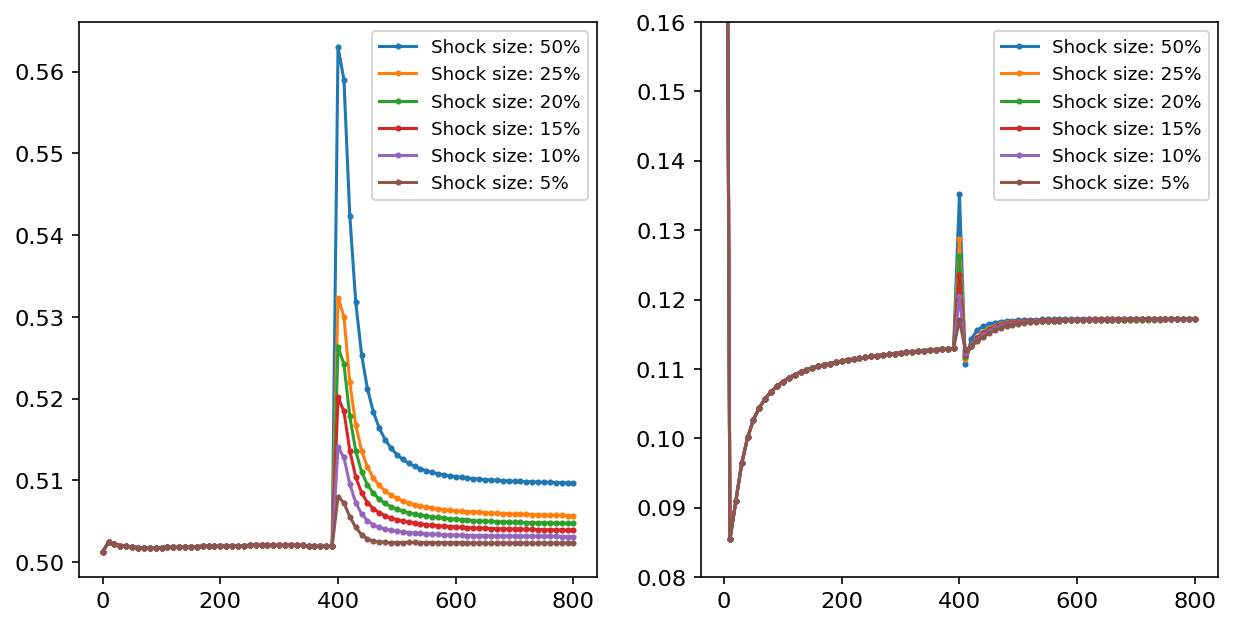

In [145]:
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})

# plot CSRL data
d100 = dataCSRL.query("seed==100")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for n_shocked in np.flip(np.unique(dataCSRL["n_shocked"])):
    dshock = dataCSRL.query("n_shocked == @n_shocked").groupby("step")
    
    N = 10000
    shock_size = n_shocked * 100 / N
    # plot errorbar
    ax1.errorbar(dshock["step"].mean(), dshock["A mean"].mean(), #yerr=dshock["A mean"].std()[::2], 
                 linestyle="-", fmt="o", ms=2, elinewidth=1., capsize=3., label=f"Shock size: {shock_size:.0f}%")

    ax2.errorbar(dshock["step"].mean(), dshock["A std"].mean(), #yerr=dshock["A mean"].std()[::2], 
                 linestyle="-", fmt="o", ms=2, elinewidth=1., capsize=3., label=f"Shock size: {shock_size:.0f}%")
    
ax1.legend(fontsize=9)
ax2.legend(fontsize=9)

ax2.set_ylim([0.08, .16])


ax1.label("asdf")

In [6]:
file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

In [158]:
def count_points_in_radius(r):
    # calculate the number of points within the given radius of the origin
    count = (2*r+1)**2
    return count

for i in range(20):
    print(i, count_points_in_radius(i))

0 1
1 9
2 25
3 49
4 81
5 121
6 169
7 225
8 289
9 361
10 441
11 529
12 625
13 729
14 841
15 961
16 1089
17 1225
18 1369
19 1521


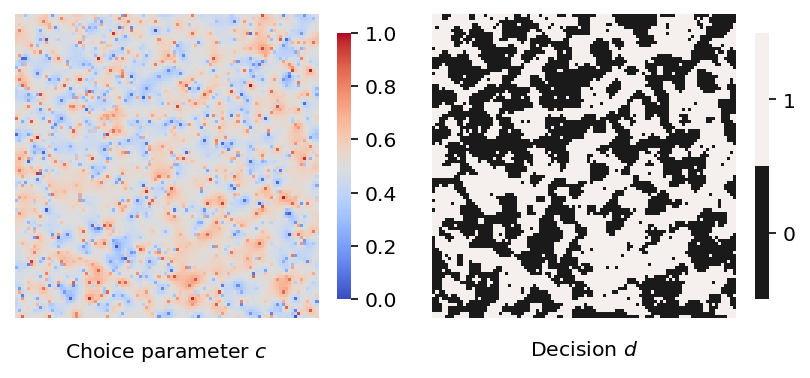

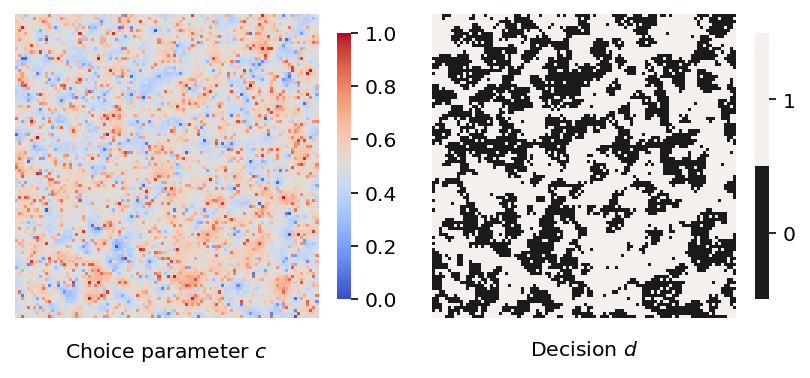

In [29]:
ShowState(attitudes[2].reshape(100, 100))
ShowState(attitudes[3].reshape(100, 100))

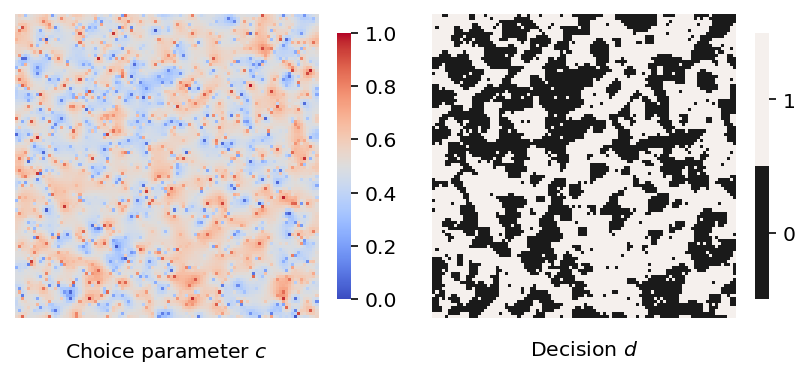

In [32]:
ShowState(attitudes[4].reshape(100, 100))

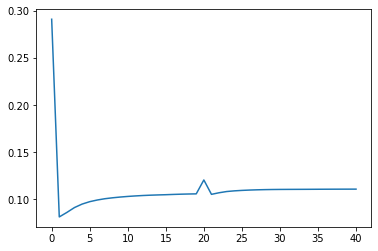

In [41]:
plt.plot(attitudes.std(axis=1))